<a href="https://colab.research.google.com/github/amitabhchanda/Deep-Learning/blob/main/Deep_Learning_Foundations2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [33]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy,testy =y[:n_train], y[n_train:]

n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [34]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)

In [35]:
# define model
model= Sequential()
model.add(Dense(500, input_dim = 2,activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', kernel_regularizer='l1'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
# simple early stopping
#es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=0,verbose=0,mode="auto",baseline=None,restore_best_weights=False,)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5',monitor='val_accuracy',mode='max', save_best_only=True) 

In [36]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=25, verbose=0, callbacks=[es, mc])

Train: 0.767, Test: 0.643


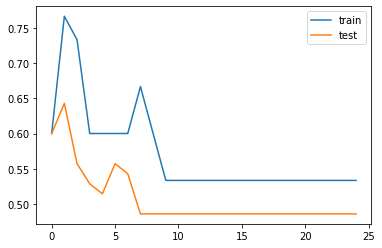

In [37]:
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


Epoch 00001: val_accuracy improved from -inf to 0.74286, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.74286

Epoch 00003: val_accuracy did not improve from 0.74286

Epoch 00004: val_accuracy did not improve from 0.74286

Epoch 00005: val_accuracy did not improve from 0.74286

Epoch 00006: val_accuracy did not improve from 0.74286

Epoch 00007: val_accuracy did not improve from 0.74286

Epoch 00008: val_accuracy did not improve from 0.74286

Epoch 00009: val_accuracy improved from 0.74286 to 0.75714, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.75714

Epoch 00011: val_accuracy improved from 0.75714 to 0.77143, saving model to best_model.h5

Epoch 00012: val_accuracy did not improve from 0.77143

Epoch 00013: val_accuracy improved from 0.77143 to 0.81429, saving model to best_model.h5

Epoch 00014: val_accuracy did not improve from 0.81429

Epoch 00015: val_accuracy did not improve from 0.81429

Epoch 00016: val_accur

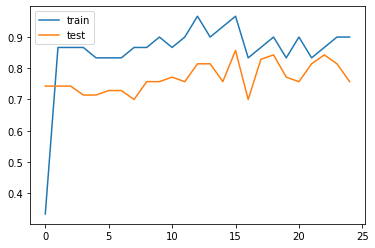

In [ ]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
adam=tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, input_dim=2, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=25, verbose=0, callbacks=[es, mc])
